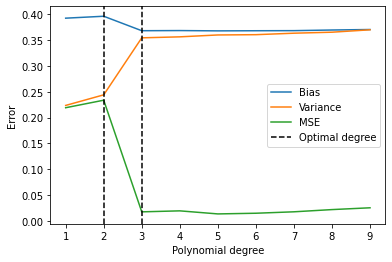

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

# Generate a synthetic dataset
np.random.seed(0)
n_samples = 50
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + 0.1 * np.random.randn(n_samples)

# Define the degrees of the polynomial to fit
degrees = range(1, 10)

# Define the number of repetitions for the cross-validation
n_splits = 100

# Initialize arrays to store the bias, variance, and mean squared error
mse = np.zeros((n_splits, len(degrees)))
bias = np.zeros((n_splits, len(degrees)))
variance = np.zeros((n_splits, len(degrees)))

# Perform the cross-validation and calculate the bias, variance, and mean squared error
cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=0)
for i, (train_index, val_index) in enumerate(cv.split(X)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    for j, degree in enumerate(degrees):
        # Transform the features to polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_val_poly = poly.transform(X_val.reshape(-1, 1))
        
        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Calculate the predictions on the validation set
        y_val_pred = model.predict(X_val_poly)
        
        # Calculate the bias, variance, and mean squared error
        mse[i, j] = mean_squared_error(y_val, y_val_pred)
        bias[i, j] = np.mean((y_val - np.mean(y_val_pred)) ** 2)
        variance[i, j] = np.var(y_val_pred)

# Calculate the average bias, variance, and mean squared error over the repetitions
mse_mean = np.mean(mse, axis=0)
bias_mean = np.mean(bias, axis=0)
variance_mean = np.mean(variance, axis=0)

# Plot the bias-variance tradeoff curve
plt.plot(degrees, bias_mean, label='Bias')
plt.plot(degrees, variance_mean, label='Variance')
plt.plot(degrees, mse_mean, label='MSE')
plt.axvline(x=2, color='k', linestyle='--', label='Optimal degree')
plt.axvline(x=3, color='k', linestyle='--')
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.legend()
plt.show()